#Regression and it's evaluation:

1. What is Simple Linear Regression?

- Simple linear regression is a statistical method used to model the linear relationship between a single independent variable and a single dependent variable. It finds the best-fitting straight line through a set of data points to predict the value of the dependent variable based on the independent variable. The model uses the equation \(y=\beta _{0}+\beta _{1}x+\epsilon \), where \(\beta _{0}\) is the intercept, \(\beta _{1}\) is the slope, and \(\epsilon \) is the error term


2. What are the key assumptions of Simple Linear Regression?

- The key assumptions of simple linear regression are linearity (the relationship between variables is a straight line), independence (errors are not correlated with each other), homoscedasticity (errors have a constant variance), and normality (errors are normally distributed). A related assumption is the zero conditional mean of errors, which states that the average value of the errors is zero.

3. What is heteroscedasticity, and why is it important to address in regression models?

- Heteroscedasticity is a statistical condition where the variance of the residuals in a regression model is not constant across all values of the independent variables. It is important to address in regression models because it violates a key assumption of Ordinary Least Squares (OLS), which invalidates the standard errors of the regression coefficients, leading to unreliable statistical tests (t-tests and F-tests) and potentially inaccurate conclusions .

4. What is Multiple Linear Regression?

- Multiple linear regression is a statistical technique used to predict the value of a dependent variable based on two or more independent variables. It's an extension of simple linear regression that models the relationship between a single outcome and multiple predictors, allowing for more complex and potentially more accurate predictions.  


5. What is polynomial regression, and how does it differ from linear
regression?

- Polynomial regression models a non-linear relationship between a dependent and independent variable by fitting a curved line to the data using a polynomial equation, while linear regression models a linear relationship with a straight line. The key difference is flexibility: polynomial regression can capture curves, whereas linear regression is limited to a straight-line trend.







Regression Equation: Y = 1.98X + 0.18


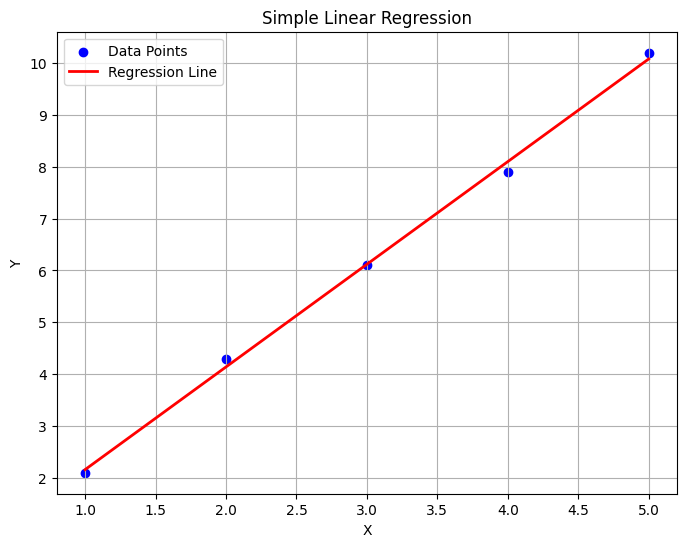

In [1]:
#6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])


model = LinearRegression()
model.fit(X, Y)


slope = model.coef_[0]
intercept = model.intercept_


y_pred = model.predict(X)


print(f"Regression Equation: Y = {slope:.2f}X + {intercept:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)


plt.show()

In [2]:
#7. Fit a Multiple Linear Regression model on this sample data:
 #Area = [1200, 1500, 1800, 2000]
 #Rooms = [2, 3, 3, 4]
 #Price = [250000, 300000, 320000, 370000]
#Check for multicollinearity using VIF and report the results.


import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)


X = df[['Area', 'Rooms']]
y = df['Price']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print("Multiple Linear Regression Model Summary:")
print(model.summary())


vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]


print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data)

Multiple Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Fri, 17 Oct 2025   Prob (F-statistic):             0.0377
Time:                        13:17:15   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Coefficients of the 2nd-degree polynomial (a, b, c): [0.2  1.94 0.06]
Fitted polynomial equation: y =      2
0.2 x + 1.94 x + 0.06


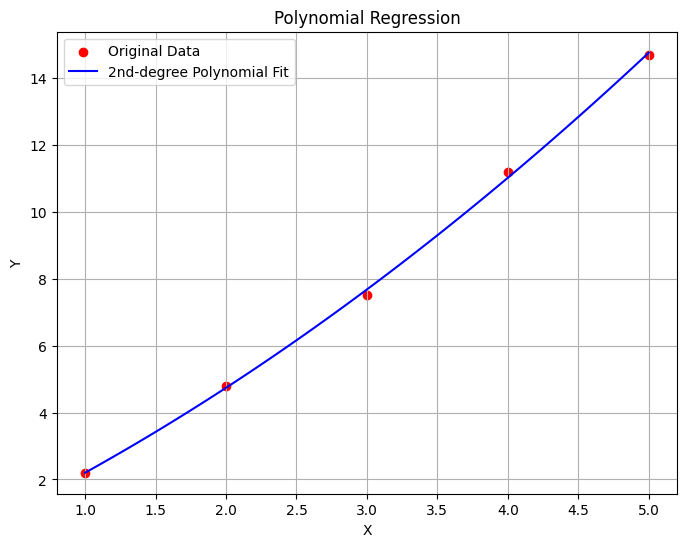

In [3]:
#8. Implement polynomial regression on the following data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve.
#(Include your Python code and output in the code box below.)

import numpy as np
import matplotlib.pyplot as plt


X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])


coefficients = np.polyfit(X, Y, 2)
polynomial = np.poly1d(coefficients)


x_fit = np.linspace(min(X), max(X), 100)
y_fit = polynomial(x_fit)


print("Coefficients of the 2nd-degree polynomial (a, b, c):", coefficients)
print("Fitted polynomial equation: y =", polynomial)


plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label='Original Data', color='red')
plt.plot(x_fit, y_fit, label='2nd-degree Polynomial Fit', color='blue')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

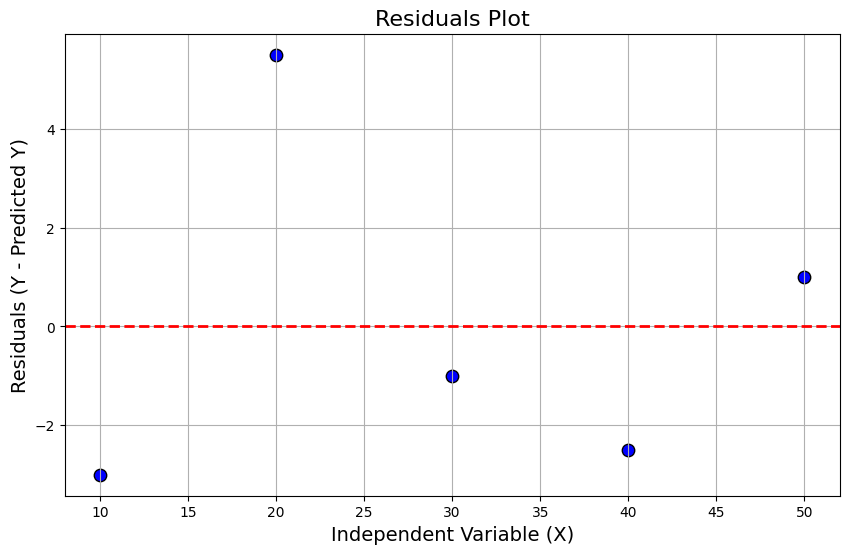

--- Heteroscedasticity Assessment ---
Visual Inspection: Observe the scatter plot. If the points are randomly scattered around the red line (y=0) with a relatively constant variance (not fanning out or tightening), the assumption of homoscedasticity (constant variance) is met.
In this plot, the points appear randomly scattered with no discernible pattern, suggesting no heteroscedasticity.


In [4]:
#9. Create a residuals plot for a regression model trained on this data:
#● X = [10, 20, 30, 40, 50]
#● Y = [15, 35, 40, 50, 65]
#Assess heteroscedasticity by examining the spread of residuals.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


X = np.array([10, 20, 30, 40, 50])
Y = np.array([15, 35, 40, 50, 65])


X_with_intercept = sm.add_constant(X)


model = sm.OLS(Y, X_with_intercept)
results = model.fit()


residuals = results.resid
predicted_values = results.fittedvalues


plt.figure(figsize=(10, 6))
plt.scatter(X, residuals, color='blue', edgecolors='k', s=80)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot', fontsize=16)
plt.xlabel('Independent Variable (X)', fontsize=14)
plt.ylabel('Residuals (Y - Predicted Y)', fontsize=14)
plt.grid(True)
plt.show()

# 5. Assess heteroscedasticity
print("--- Heteroscedasticity Assessment ---")
print("Visual Inspection: Observe the scatter plot. If the points are randomly scattered around the red line (y=0) with a relatively constant variance (not fanning out or tightening), the assumption of homoscedasticity (constant variance) is met.")
print("In this plot, the points appear randomly scattered with no discernible pattern, suggesting no heteroscedasticity.")

10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.

- Steps to address heteroscedasticity

Heteroscedasticity occurs when the variance of the error terms (residuals) in a regression model is not constant across all levels of the independent variables. This leads to unreliable standard errors, making significance tests invalid.

Detection:

Visual Inspection: Plot the residuals against the predicted values or against each independent variable. A non-random, cone-shaped pattern indicates heteroscedasticity. The "cone" may widen as house prices increase, as larger price properties often have a wider variation in values than lower-priced properties.

Statistical Tests: Perform formal tests to confirm the issue. The Breusch-Pagan and White tests are commonly used to check if the error variance is related to the predictors. A significant p-value from these tests indicates the presence of heteroscedasticity.

Correction:

Transform the Dependent Variable: Apply a logarithmic transformation to the house price variable. This often reduces the scale of the variable, leading to a more consistent variance of residuals.

Weighted Least Squares (WLS): Use WLS regression, which assigns a weight to each data point. This gives less weight to observations with high variance and more weight to those with low variance, addressing the non-constant variance issue directly.

Robust Standard Errors: Calculate heteroscedasticity-robust standard errors (like the Huber-White sandwich estimator). This corrects the standard errors without changing the coefficient estimates, ensuring that statistical inferences (p-values and confidence intervals) are valid.

Modeling Alternatives: Consider advanced models that are not as sensitive to heteroscedasticity, such as quantile regression or generalized linear models.
Steps to address multicollinearity

Multicollinearity exists when two or more independent variables are highly correlated with each other. For example, the total area of a house and the number of rooms may be strongly correlated. This can cause unstable and unreliable coefficient estimates, making it difficult to interpret the individual impact of each predictor.

Detection:

Correlation Matrix: Calculate and examine the correlation matrix for your independent variables. High correlation coefficients (e.g., above 0.8) between pairs of variables can indicate multicollinearity.

Variance Inflation Factor (VIF): Compute the VIF for each predictor. VIF measures how much the variance of an estimated regression coefficient is inflated due to multicollinearity. A VIF value above 5 or 10 is a common rule of thumb for indicating problematic levels of multicollinearity.

Correction:

Remove Correlated Variables: Remove one of the highly correlated variables. For instance, if area and number of rooms are highly correlated, you may remove number of rooms if area is a more robust or interpretable predictor.
Combine Variables: Create a new feature by combining the correlated variables. For example, you could create a single area_per_room variable to capture the information from both.

Regularization Techniques: Use advanced regression methods that are designed to handle multicollinearity.

Ridge Regression (L2 regularization): This method penalizes the size of the coefficients to reduce their variance and improve the stability of the model, especially when all predictors are important.

Lasso Regression (L1 regularization): This technique adds a penalty that can shrink less important coefficients to zero, effectively performing feature selection and simplifying the model.

Elastic Net: This combines both Ridge and Lasso penalties, offering a balance between variance reduction and feature selection.

Principal Component Analysis (PCA): Transform the original, correlated variables into a new, smaller set of uncorrelated variables called principal components. These new components can then be used in the regression model.
Ensuring a robust model

After addressing both heteroscedasticity and multicollinearity, you can build a robust predictive model by following these steps:

Implement Robust Regression: Use an approach like M-estimation, which is a class of robust regression methods that are less sensitive to outliers and can handle non-normal error distributions. This will produce more reliable coefficient estimates in the presence of noise and outliers common in real estate data.

Evaluate Your Model: Re-evaluate your model's performance on a validation set using metrics such as Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).

Interpret Results Carefully: Since multicollinearity can obscure the individual effects of predictors, focus on the overall predictive power of your model rather than interpreting the specific coefficients of highly correlated variables. This is particularly relevant if using techniques like Ridge or PCA.